In [1]:
import numpy as np
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [3]:
air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
OC_LENS = ml.open_material('OC_LENS', 'Material')
OC_HRI_LENS = ml.open_material('OC_HRI_LENS', 'Material')
SiO2_LENS = ml.open_material('SiO2_LENS', 'Sellmeier')
ITO_LENS = ml.open_material('ITO_LENS', 'Sellmeier')
SiN_LENS = ml.open_material('SiN_LENS', 'Sellmeier')
SiO2_LENS.k = 1e-5
SiN_LENS.k = 1e-5

In [23]:
wl = np.linspace(400, 700, 100)
wl1 = np.linspace(400, 450, 51)
wl2 = np.linspace(450, 700, 251)

bridge_11 = lambda th:tm.Design(
    [air, OC_HRI_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, OC_LENS, ITO_LENS ,SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr']-th['oc'], th['t_sin'], th['t_sio2'], th['b_ito'], th['oc'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl1)
diamond_11 = lambda th: tm.Design(
    [air, OC_HRI_LENS, SiN_LENS, SiO2_LENS, ITO_LENS ,SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl1)
trace_11 = lambda th: tm.Design(
    [air, OC_HRI_LENS, SiN_LENS, SiO2_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'],th['b_sio2'], th['b_sin'], None]
).reflectance(wl1)
bridge_12 = lambda th:tm.Design(
    [air, OC_HRI_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, OC_LENS, ITO_LENS ,SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr']-th['oc'], th['t_sin'], th['t_sio2'], th['b_ito'], th['oc'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)
diamond_12 = lambda th: tm.Design(
    [air, OC_HRI_LENS, SiN_LENS, SiO2_LENS, ITO_LENS ,SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)
trace_12 = lambda th: tm.Design(
    [air, OC_HRI_LENS, SiN_LENS, SiO2_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'],th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)

delta_d_b_11 = lambda th: sum(abs(diamond_11(th)-bridge_11(th)))
delta_d_t_11 = lambda th: sum(abs(diamond_11(th)-trace_11(th)))
delta_d_b_12 = lambda th: sum(abs(diamond_12(th)-bridge_12(th)))
delta_d_t_12 = lambda th: sum(abs(diamond_12(th)-trace_12(th)))

def th(tht):
    th = {}
    th['acr'] = tht[0]
    th['t_sin'] = tht[1]
    th['t_sio2'] = tht[2]
    th['b_ito'] = tht[3]
    th['oc'] = tht[4]
    th['ito'] = tht[5]
    th['b_sio2'] = tht[6]
    th['b_sin'] = tht[7]
    return th
fom = lambda tht: delta_d_b_11(th(tht))+1.5*delta_d_t_11(th(tht))+delta_d_b_12(th(tht))+delta_d_t_12(th(tht))

In [24]:
res = differential_evolution(
    fom, [
        (1700,1900),(4,40),(10,80),(20,30),(1000,2000),(20,30),(10,80),(4,40)
    ]
)

[1878.36263106   11.65663296   10.           20.         1907.6139549
   20.           33.22582527   12.52391244]


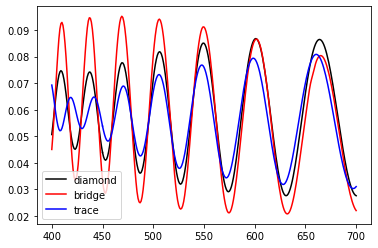

In [25]:
print(res.x)
te = th(res.x)
plt.plot(wl1, diamond_11(te), 'k-', label = 'diamond')
plt.plot(wl1, bridge_11(te), 'r-', label = 'bridge')
plt.plot(wl1, trace_11(te), 'b-', label = 'trace')
plt.plot(wl2, diamond_12(te), 'k-')
plt.plot(wl2, bridge_12(te), 'r-')
plt.plot(wl2, trace_12(te), 'b-')
plt.legend(loc = 'best')
#plt.savefig('test2.png')
plt.show()

In [ ]:
bridge_21 = lambda th:tm.Design(
    [air, Acrylic, SiN, SiO2, SiN, SiO2, ITO, OC_t, ITO ,SiO2, SiN, sodalime],
    [None, th['acr']-th['oc'], th['tt_sin'], th['tt_sio2'], th['t_sin'], th['t_sio2'], th['b_ito'], th['oc'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl1)
diamond_21 = lambda th: tm.Design(
    [air, Acrylic, SiN, SiO2, SiN, SiO2, ITO ,SiO2, SiN, sodalime],
    [None, th['acr'], th['tt_sin'], th['tt_sio2'],th['t_sin'], th['t_sio2'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl1)
trace_21 = lambda th: tm.Design(
    [air, Acrylic, SiN, SiO2, SiN, SiO2, SiO2, SiN, sodalime],
    [None, th['acr'], th['tt_sin'], th['tt_sio2'], th['t_sin'], th['t_sio2'],th['b_sio2'], th['b_sin'], None]
).reflectance(wl1)

bridge_22 = lambda th:tm.Design(
    [air, Acrylic, SiN, SiO2, SiN, SiO2, ITO, OC_t, ITO ,SiO2, SiN, sodalime],
    [None, th['acr']-th['oc'], th['tt_sin'], th['tt_sio2'], th['t_sin'], th['t_sio2'], th['b_ito'], th['oc'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)
diamond_22 = lambda th: tm.Design(
    [air, Acrylic, SiN, SiO2, SiN, SiO2, ITO ,SiO2, SiN, sodalime],
    [None, th['acr'], th['tt_sin'], th['tt_sio2'],th['t_sin'], th['t_sio2'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)
trace_22 = lambda th: tm.Design(
    [air, Acrylic, SiN, SiO2, SiN, SiO2, SiO2, SiN, sodalime],
    [None, th['acr'], th['tt_sin'], th['tt_sio2'], th['t_sin'], th['t_sio2'],th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)

delta_d_b_21 = lambda th: sum(abs(diamond_21(th)-bridge_21(th)))
delta_d_t_21 = lambda th: sum(abs(diamond_21(th)-trace_21(th)))
delta_d_b_22 = lambda th: sum(abs(diamond_22(th)-bridge_22(th)))
delta_d_t_22 = lambda th: sum(abs(diamond_22(th)-trace_22(th)))

def th2(tht):
    th = {}
    th['acr'] = tht[0]
    th['tt_sin'] = tht[1]
    th['tt_sio2'] = tht[2]
    th['t_sin'] = tht[3]
    th['t_sio2'] = tht[4]
    th['b_ito'] = tht[5]
    th['oc'] = tht[6]
    th['ito'] = tht[7]
    th['b_sio2'] = tht[8]
    th['b_sin'] = tht[9]
    return th
fom2 = lambda tht: delta_d_b_21(th2(tht)) + 5*delta_d_t_21(th2(tht)) + delta_d_b_22(th2(tht)) + delta_d_t_22(th2(tht))

In [101]:
res2 = differential_evolution(
    fom2, [
        (1700,1900),(4,20),(20,80),(4,20),(20,80),(20,26),(1000,2000),(20,26),(20,80),(4,20)
    ]
)

print(res2.x)
te2 = th2(res2.x)
plt.plot(wl1, diamond_21(te2), 'k-', label = 'diamond')
plt.plot(wl1, bridge_21(te2), 'r-', label = 'bridge')
plt.plot(wl1, trace_21(te2), 'b-', label = 'trace')
plt.plot(wl2, diamond_22(te2), 'k-')
plt.plot(wl2, bridge_22(te2), 'r-')
plt.plot(wl2, trace_22(te2), 'b-')
plt.legend(loc = 'best')
plt.show()